Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)
library(ggplot2)


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.3.0
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 10, 10, 1, 3, 8, 13, 5, 5, 3, 6, 10, 4, 11…
$ Glucose                  <dbl> 85, 115, 139, 103, 126, 99, 145, 117, 109, 88…
$ BloodPressure            <dbl> 66, 0, 80, 30, 88, 84, 82, 92, 75, 58, 92, 78…
$ SkinThickness            <dbl> 29, 0, 0, 38, 41, 0, 19, 0, 26, 11, 0, 31, 33…
$ Insulin                  <dbl> 0, 0, 0, 83, 235, 0, 110, 0, 0, 54, 0, 0, 192…
$ BMI                      <dbl> 26.6, 35.3, 27.1, 43.3, 39.3, 35.4, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.134, 1.441, 0.183, 0.704, 0.388, 0.2…
$ Age                      <dbl> 31, 29, 57, 33, 27, 50, 57, 38, 60, 22, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome, whether or not had diabetes, is suitable as the "outcome" in a logistic regression model. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |  Plasma glucose concentration a 2 hours in an oral glucose tolerance test         
| BMI         |   Body mass index (weight in kg/(height in m)^2)           |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

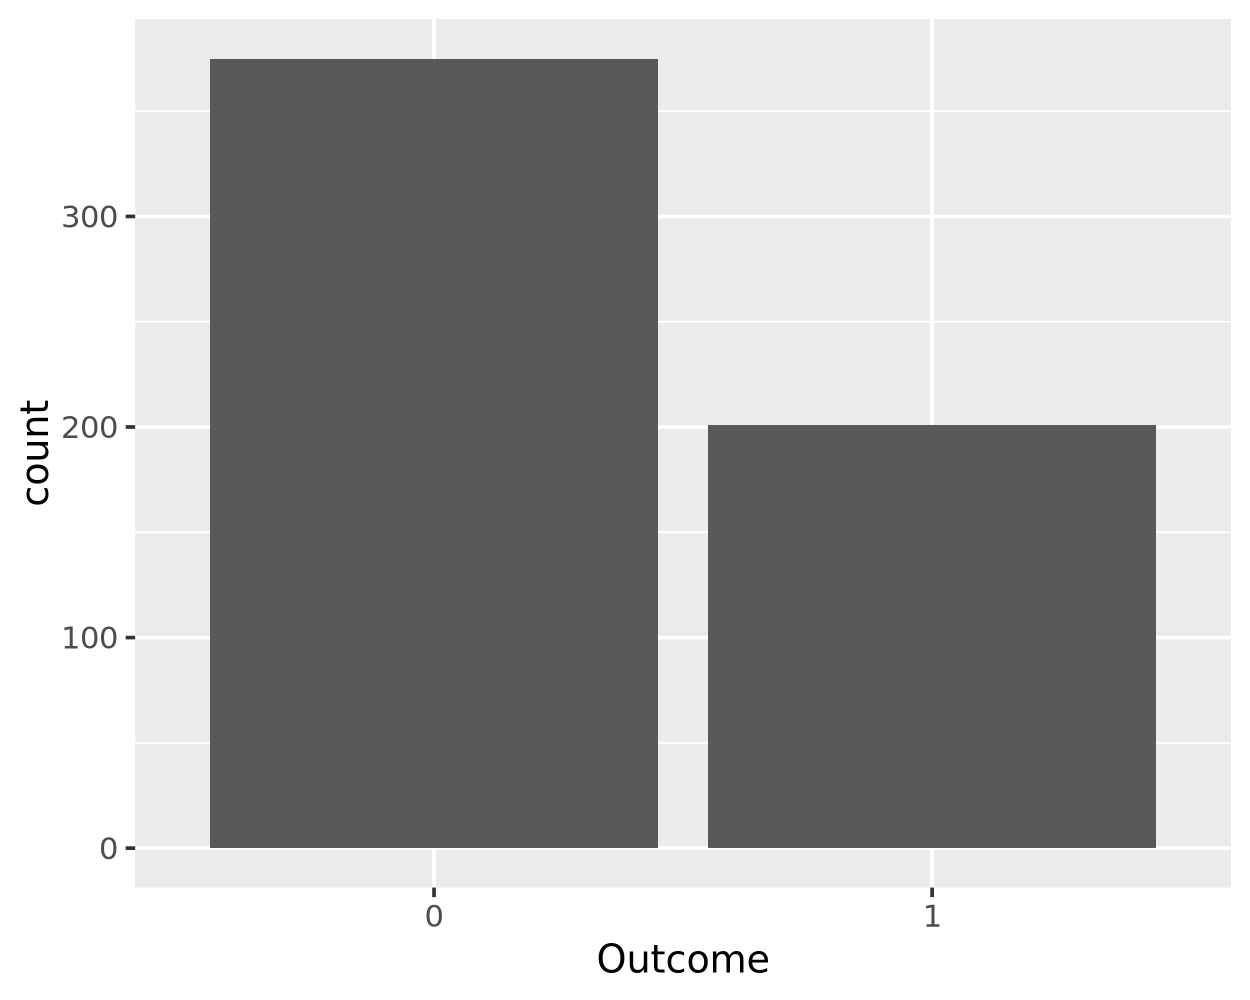

In [5]:
ggplot(data=diabetes_train, mapping = aes(x=Outcome)) +
    geom_bar() 

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced. We do not have equal counts of each outcome.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,139.0
0,BMI,27.1


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

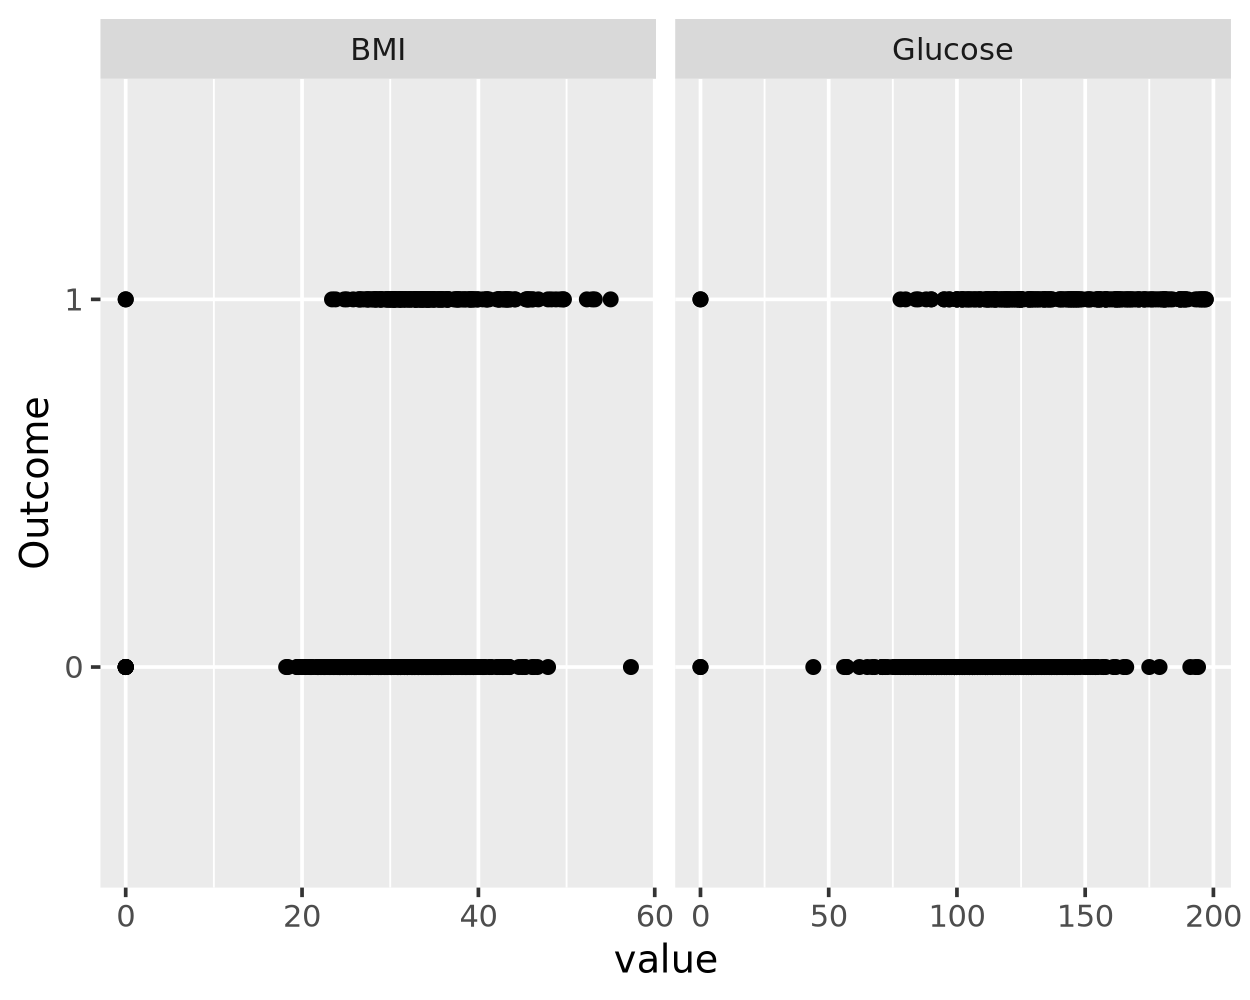

In [7]:
ggplot(plot_df, mapping = aes(x = value, y = Outcome)) +
       geom_point() +
       facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

The scale on the x-axis would be the same for BMI and glucose. 

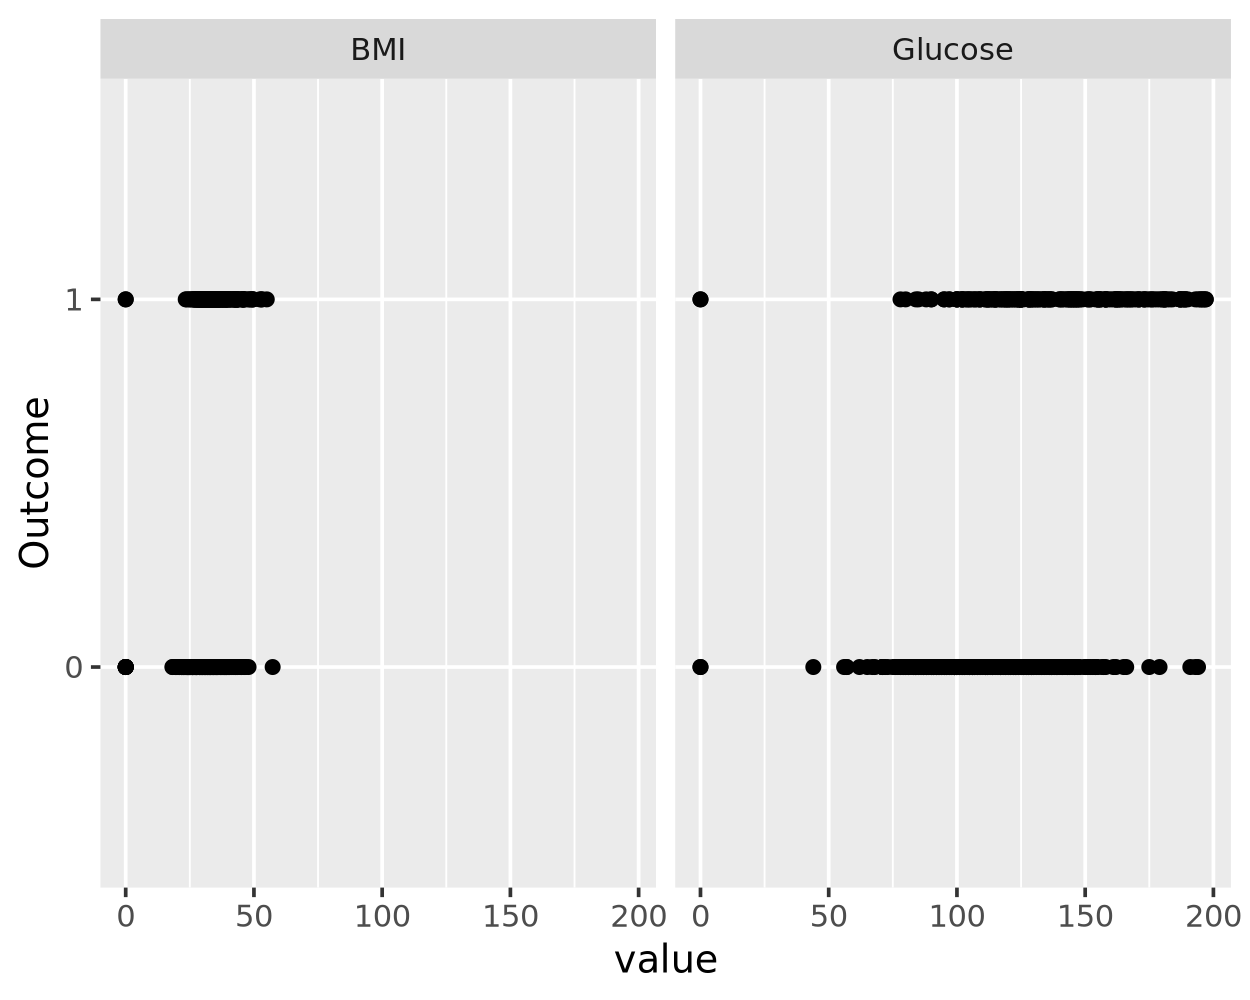

In [8]:
ggplot(plot_df, mapping = aes(x = value, y = Outcome)) +
       geom_point() +
       facet_wrap(~name, ncol = 2)

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [9]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)
rec_prepped = prep(rec, diabetes_train)
rec_prepped |> 
    juice()
    head()

BMI,Glucose,Outcome
<dbl>,<dbl>,<fct>
26.6,85,0
35.3,115,0
27.1,139,0
43.3,103,0
39.3,126,0
35.4,99,0
22.2,145,0
34.1,117,0
36.0,109,0


ERROR: Error in head.default(): argument "x" is missing, with no default


In [10]:

mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prepped))
mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.75116      0.07977      0.03642  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 580 	AIC: 586

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [37]:

diabetes_test_wPred = augment(mod_fit, juice(rec_prepped))
diabetes_test_wPred |> head()


.pred_class,.pred_0,.pred_1,BMI,Glucose,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9114857,0.08851431,28.1,89,0
0,0.8302780,0.16972202,25.6,116,0
0,0.6906757,0.30932429,35.3,115,0
0,0.6562953,0.34370471,27.1,139,0
0,0.6345837,0.36541625,43.3,103,0
0,0.5189773,0.48102272,39.3,126,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [38]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 113  35
         1  12  32

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:*67 individuals had diabetes. Of those that actually had diabetes, 32 were predicted to have diabetes. 12 individuals predicted to have diabetes did not have diabetes*